In [240]:
import pandas as pd
import numpy as np
import scipy
import random
from svmutil import *
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
import statistics

In [241]:
random.seed(42)

# Train-test split

In [242]:
data = pd.read_csv("abalone.data",names=['sex','length','diameter','height','whole weight','shucked weight',
                                        'viscera weight','shell weight','rings'])
data = data.assign(sex=data.sex.apply(lambda x: 1 if x=='M' else 0))
data = data.assign(rings=data.rings.apply(lambda x: 1 if x <=9 else -1))

In [243]:
data.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,-1
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,-1
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1


In [244]:
train = data.values[:3133]
test = data.values[3133:]
train.shape, test.shape

((3133, 9), (1044, 9))

In [245]:
train_x = train[:,:-1]
train_y = train[:,-1]

test_x = test[:,:-1]
test_y = test[:,-1]

# Scale

In [248]:
train_x = scipy.sparse.csr_matrix(train_x)
test_x = scipy.sparse.csr_matrix(test_x)

In [249]:
scale_param = csr_find_scale_param(train_x, lower=0)

In [250]:
train_x = csr_scale(train_x, scale_param)
test_x = csr_scale(test_x, scale_param)

# K-fold cross validation

In [251]:
kfold = KFold(10, shuffle=True, random_state=42)

In [252]:
%%time
errors = []

for d in range(1, 5):
    for k in range(-10, 11):
        param = svm_parameter('-c {} -d {} -t 1'.format(2**k, d))
        ite = 0
        
        for train, test in kfold.split(train_x):

            prob = svm_problem(train_y[train], train_x[train])

            m = svm_train(prob, param)
            p_label, p_acc, p_val = svm_predict(train_y[test], train_x[test], m)

            errors.append({'d':d, 'k':k, 'ite':ite, 'error': 100-p_acc[0]})
            ite += 1
            
errors = pd.DataFrame(errors)

Accuracy = 45.2229% (142/314) (classification)
Accuracy = 58.5987% (184/314) (classification)
Accuracy = 52.5478% (165/314) (classification)
Accuracy = 51.4377% (161/313) (classification)
Accuracy = 52.3962% (164/313) (classification)
Accuracy = 52.0767% (163/313) (classification)
Accuracy = 50.7987% (159/313) (classification)
Accuracy = 51.4377% (161/313) (classification)
Accuracy = 50.4792% (158/313) (classification)
Accuracy = 45.0479% (141/313) (classification)
Accuracy = 45.2229% (142/314) (classification)
Accuracy = 58.5987% (184/314) (classification)
Accuracy = 52.5478% (165/314) (classification)
Accuracy = 51.4377% (161/313) (classification)
Accuracy = 52.3962% (164/313) (classification)
Accuracy = 52.0767% (163/313) (classification)
Accuracy = 50.7987% (159/313) (classification)
Accuracy = 51.4377% (161/313) (classification)
Accuracy = 50.4792% (158/313) (classification)
Accuracy = 45.0479% (141/313) (classification)
Accuracy = 45.2229% (142/314) (classification)
Accuracy = 58

Accuracy = 79.2332% (248/313) (classification)
Accuracy = 82.7476% (259/313) (classification)
Accuracy = 79.5527% (249/313) (classification)
Accuracy = 79.8722% (250/313) (classification)
Accuracy = 76.6773% (240/313) (classification)
Accuracy = 78.6624% (247/314) (classification)
Accuracy = 82.8025% (260/314) (classification)
Accuracy = 78.9809% (248/314) (classification)
Accuracy = 78.5942% (246/313) (classification)
Accuracy = 75.3994% (236/313) (classification)
Accuracy = 78.5942% (246/313) (classification)
Accuracy = 83.3866% (261/313) (classification)
Accuracy = 78.9137% (247/313) (classification)
Accuracy = 79.8722% (250/313) (classification)
Accuracy = 76.6773% (240/313) (classification)
Accuracy = 78.6624% (247/314) (classification)
Accuracy = 82.8025% (260/314) (classification)
Accuracy = 78.9809% (248/314) (classification)
Accuracy = 78.2748% (245/313) (classification)
Accuracy = 76.0383% (238/313) (classification)
Accuracy = 78.2748% (245/313) (classification)
Accuracy = 83

Accuracy = 79.9363% (251/314) (classification)
Accuracy = 75.7962% (238/314) (classification)
Accuracy = 76.0383% (238/313) (classification)
Accuracy = 73.8019% (231/313) (classification)
Accuracy = 79.2332% (248/313) (classification)
Accuracy = 79.5527% (249/313) (classification)
Accuracy = 79.2332% (248/313) (classification)
Accuracy = 75.3994% (236/313) (classification)
Accuracy = 74.4409% (233/313) (classification)
Accuracy = 78.9809% (248/314) (classification)
Accuracy = 81.2102% (255/314) (classification)
Accuracy = 75.7962% (238/314) (classification)
Accuracy = 76.9968% (241/313) (classification)
Accuracy = 73.4824% (230/313) (classification)
Accuracy = 79.5527% (249/313) (classification)
Accuracy = 80.5112% (252/313) (classification)
Accuracy = 79.2332% (248/313) (classification)
Accuracy = 76.6773% (240/313) (classification)
Accuracy = 75.7188% (237/313) (classification)
Accuracy = 78.6624% (247/314) (classification)
Accuracy = 81.8471% (257/314) (classification)
Accuracy = 76

Accuracy = 70.2875% (220/313) (classification)
Accuracy = 70.607% (221/313) (classification)
Accuracy = 68.6901% (215/313) (classification)
Accuracy = 76.1146% (239/314) (classification)
Accuracy = 75.7962% (238/314) (classification)
Accuracy = 72.9299% (229/314) (classification)
Accuracy = 70.607% (221/313) (classification)
Accuracy = 69.9681% (219/313) (classification)
Accuracy = 74.7604% (234/313) (classification)
Accuracy = 73.8019% (231/313) (classification)
Accuracy = 72.8435% (228/313) (classification)
Accuracy = 70.607% (221/313) (classification)
Accuracy = 69.9681% (219/313) (classification)
Accuracy = 75.4777% (237/314) (classification)
Accuracy = 76.1146% (239/314) (classification)
Accuracy = 72.6115% (228/314) (classification)
Accuracy = 71.246% (223/313) (classification)
Accuracy = 71.5655% (224/313) (classification)
Accuracy = 76.3578% (239/313) (classification)
Accuracy = 74.1214% (232/313) (classification)
Accuracy = 73.1629% (229/313) (classification)
Accuracy = 72.204

Accuracy = 57.3248% (180/314) (classification)
Accuracy = 55.5911% (174/313) (classification)
Accuracy = 55.2716% (173/313) (classification)
Accuracy = 56.23% (176/313) (classification)
Accuracy = 53.6741% (168/313) (classification)
Accuracy = 54.9521% (172/313) (classification)
Accuracy = 53.6741% (168/313) (classification)
Accuracy = 48.5623% (152/313) (classification)
Accuracy = 53.1847% (167/314) (classification)
Accuracy = 65.2866% (205/314) (classification)
Accuracy = 62.7389% (197/314) (classification)
Accuracy = 61.3419% (192/313) (classification)
Accuracy = 60.3834% (189/313) (classification)
Accuracy = 58.7859% (184/313) (classification)
Accuracy = 59.1054% (185/313) (classification)
Accuracy = 58.147% (182/313) (classification)
Accuracy = 59.4249% (186/313) (classification)
Accuracy = 53.9936% (169/313) (classification)
Accuracy = 59.8726% (188/314) (classification)
Accuracy = 68.1529% (214/314) (classification)
Accuracy = 67.5159% (212/314) (classification)
Accuracy = 64.85

In [253]:
errors = pd.DataFrame(errors)

In [254]:
errors.head()

,d,k,ite,error
0,1,-10,0,54.777070
1,1,-10,1,41.401274
2,1,-10,2,47.452229
3,1,-10,3,48.562300
4,1,-10,4,47.603834


# Plot error

In [255]:
to_plot = errors.groupby(['d','k']).agg({'error':['mean','std']}).reset_index()

In [256]:
to_plot = to_plot.assign(lower = to_plot['error']['mean']-to_plot['error']['std'])
to_plot = to_plot.assign(upper = to_plot['error']['mean']+to_plot['error']['std'])
to_plot = to_plot.assign(middle = to_plot['error']['mean'])

In [257]:
to_plot.head()

d   k      error                lower      upper     middle
               mean       std                                 
0  1 -10  48.995645  3.840445  45.155200  52.836091  48.995645
1  1  -9  48.995645  3.840445  45.155200  52.836091  48.995645
2  1  -8  48.995645  3.840445  45.155200  52.836091  48.995645
3  1  -7  47.847215  4.634573  43.212642  52.481788  47.847215
4  1  -6  31.250076  3.208876  28.041201  34.458952  31.250076

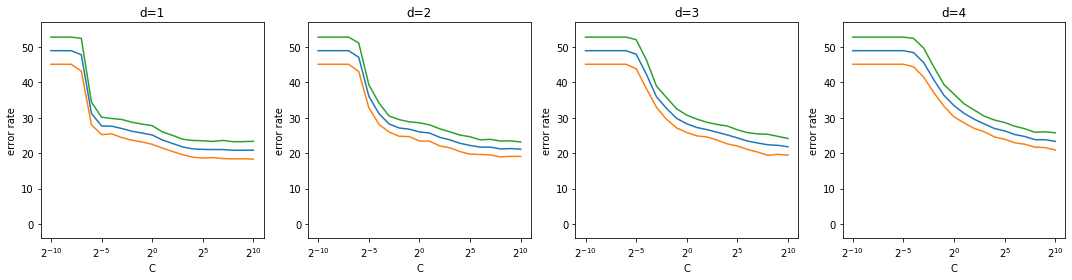

In [258]:
f = plt.figure(figsize=(15, 4))
for d in range(1, 5):
    ax = plt.subplot(1, 4, d)
    df = to_plot[to_plot.d == d]
    
    ax.plot(df.k, df.middle)
    ax.plot(df.k, df.lower)
    ax.plot(df.k, df.upper)
    ax.set_ylim(-4, 57)
    ax.set_xticks([-10, -5, 0, 5, 10])
    ax.set_xticklabels(['$2^{-10}$','$2^{-5}$','$2^{0}$','$2^{5}$','$2^{10}$'])
    
    ax.set_ylabel('error rate')
    ax.set_xlabel('C')
    ax.set_title(f'd={d}')
plt.tight_layout()
# plt.savefig('./c.4.pdf')

# Identify $C^*$

In [259]:
to_plot[to_plot.middle == to_plot.middle.min()]

d  k      error                lower      upper     middle
               mean       std                                 
18  1  8  20.811644  2.424824  18.386821  23.236468  20.811644

In [263]:
%%time
cross_errors = []
cross_sv = []

for d in range(1, 5):
    param = svm_parameter('-c {} -d {} -t 1'.format(2**8, d))
    ite = 0

    for train, test in kfold.split(train_x):

        prob = svm_problem(train_y[train], train_x[train])

        m = svm_train(prob, param)
        p_label, p_acc, p_val = svm_predict(train_y[test], train_x[test], m)
        
        cross_errors.append({'d':d, 'ite':ite, 'error': (100-p_acc[0])/100})
        cross_sv.append({'d':d, 'ite':ite, 'sv': m.get_nr_sv()})
        ite += 1
            
cross_errors = pd.DataFrame(cross_errors)
cross_sv = pd.DataFrame(cross_sv)

Accuracy = 78.6624% (247/314) (classification)
Accuracy = 82.8025% (260/314) (classification)
Accuracy = 78.9809% (248/314) (classification)
Accuracy = 78.5942% (246/313) (classification)
Accuracy = 75.3994% (236/313) (classification)
Accuracy = 78.5942% (246/313) (classification)
Accuracy = 83.3866% (261/313) (classification)
Accuracy = 78.9137% (247/313) (classification)
Accuracy = 79.8722% (250/313) (classification)
Accuracy = 76.6773% (240/313) (classification)
Accuracy = 78.9809% (248/314) (classification)
Accuracy = 82.4841% (259/314) (classification)
Accuracy = 78.0255% (245/314) (classification)
Accuracy = 78.2748% (245/313) (classification)
Accuracy = 75.0799% (235/313) (classification)
Accuracy = 80.8307% (253/313) (classification)
Accuracy = 81.4696% (255/313) (classification)
Accuracy = 77.3163% (242/313) (classification)
Accuracy = 78.5942% (246/313) (classification)
Accuracy = 76.9968% (241/313) (classification)
Accuracy = 76.4331% (240/314) (classification)
Accuracy = 83

In [266]:
cross_errors_mean = cross_errors.groupby('d').error.mean().reset_index()
cross_sv_mean = cross_sv.groupby('d').sv.mean().reset_index()

In [265]:
%%time
test_errors = []

for d in range(1, 5):
    param = svm_parameter('-c {} -d {} -t 1'.format(2**8, d))
    ite = 0

    prob = svm_problem(train_y, train_x)

    m = svm_train(prob, param)
    p_label, p_acc, p_val = svm_predict(test_y, test_x, m)

    test_errors.append({'d':d, 'ite':ite, 'error': (100-p_acc[0])/100})
    
    ite += 1
            
test_errors = pd.DataFrame(test_errors)

Accuracy = 77.1073% (805/1044) (classification)
Accuracy = 76.5326% (799/1044) (classification)
Accuracy = 75.4789% (788/1044) (classification)
Accuracy = 74.1379% (774/1044) (classification)
CPU times: user 920 ms, sys: 10.4 ms, total: 930 ms
Wall time: 980 ms


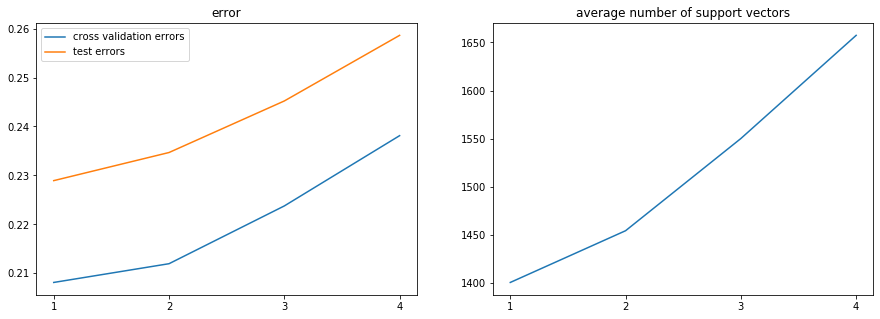

In [273]:
fig = plt.figure(figsize=(15, 5))

ax = plt.subplot(1,2,1)
plt.plot([1,2,3,4], cross_errors_mean.error, label='cross validation errors')
plt.plot([1,2,3,4], test_errors.error, label='test errors')
ax.title.set_text('error')
plt.legend()
ax.set_xticks([1,2,3,4])

ax = plt.subplot(1,2,2)
plt.plot([1,2,3,4], cross_sv_mean.sv)
ax.title.set_text('average number of support vectors')
ax.set_xticks([1,2,3,4])

plt.savefig('./c.5.pdf')

In [274]:
cross_sv_mean

,d,sv
0,1,1400.4
1,2,1454.2
2,3,1550.1
3,4,1657.4


# Verify plot using sklearn library

In [220]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

# load data
data = pd.read_csv("abalone.data",names=['sex','length','diameter','height','whole weight','shucked weight',
                                        'viscera weight','shell weight','rings'])
data = data.assign(sex=data.sex.apply(lambda x: 1 if x=='M' else 0))
data = data.assign(rings=data.rings.apply(lambda x: 1 if x <=9 else -1))

# train test split
train = data.values[:3133]
test = data.values[3133:]

train_x = train[:,:-1]
train_y = train[:,-1]
test_x = test[:,:-1]
test_y = test[:,-1]

# scale
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [221]:
sv = []
scores = []
for d in range(1, 5):
    svm = SVC(C = 2**8, kernel='poly', degree=d)
    svm.fit(train_x, train_y)
    scores.append(1-svm.score(test_x, test_y))
    sv.append(np.sum(svm.n_support_))

/Users/michael/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/michael/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/michael/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/michael/opt/anaconda3/lib/pyth

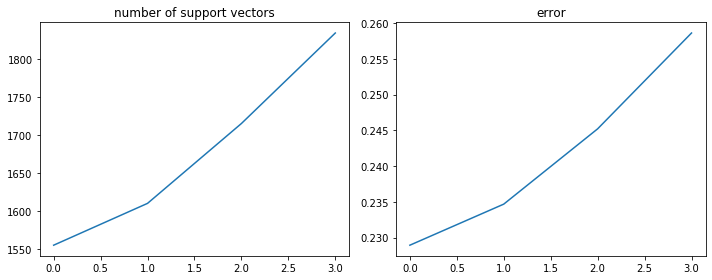

In [229]:
fig = plt.figure(figsize=(10, 4))

ax = plt.subplot(1,2,1)
ax.plot(sv)
ax.title.set_text('number of support vectors')

ax = ax = plt.subplot(1,2,2)
ax.plot(scores)
ax.title.set_text('error')

plt.tight_layout()